In [2]:
#importing pandas as pd
import pandas as pd
import numpy as np

# Concatenating Datasets with Pandas

In [2]:
#creating a dummy dataframe

In [3]:
df1_dummy = {
    "serial_id": ["1", "2", "2", "4", "5"],
    "sales_month": ["Jan", "Feb", "Mar", "Apr", "May"],
    "sales": ["12300", "25100", "17320", "20100", "22200"]
}

In [4]:
df1 = pd.DataFrame(df1_dummy, columns = ["serial_id", "sales_month", "sales"])

In [5]:
df1

,serial_id,sales_month,sales
0,1,Jan,12300
1,2,Feb,25100
2,2,Mar,17320
3,4,Apr,20100
4,5,May,22200


In [6]:
df2_dummy = {
    "serial_id" : ["6", "7", "8", "9", "10"],
    "sales_month": ["Jun", "Jul", "Aug", "Sep", "Oct"],
    "sales": ["23400", "23771", "18000", "50343", "30000"]
}

In [7]:
df2 = pd.DataFrame(df2_dummy, columns = ["serial_id", "sales_month", "sales"])

In [8]:
df2

,serial_id,sales_month,sales
0,6,Jun,23400
1,7,Jul,23771
2,8,Aug,18000
3,9,Sep,50343
4,10,Oct,30000


In [9]:
df3_dummy = {
    "sales_threshold" : ["Yes", "Yes", "No", "No", "Yes", "Yes", "Yes,", "No", "No", "No"],
    "bonus_threshold" : ["Yes", "No", "Yes", "No", "No", "Yes", "Yes,", "No", "No", "No"]
}

In [10]:
df3 = pd.DataFrame(df3_dummy, columns = ["sales_threshold", "bonus_threshold"])

In [11]:
df3

,sales_threshold,bonus_threshold
0,Yes,Yes
1,Yes,No
2,No,Yes
3,No,No
4,Yes,No
5,Yes,Yes
6,"Yes,","Yes,"
7,No,No
8,No,No
9,No,No


In [12]:
df_row = pd.concat([df1, df2], ignore_index= True )

In [13]:
df_row

,serial_id,sales_month,sales
0,1,Jan,12300
1,2,Feb,25100
2,2,Mar,17320
3,4,Apr,20100
4,5,May,22200
5,6,Jun,23400
6,7,Jul,23771
7,8,Aug,18000
8,9,Sep,50343
9,10,Oct,30000


In [14]:
#concatenate the new DF with 3rd
df_full = pd.concat([df_row, df3], axis=1)
df_full

,serial_id,sales_month,sales,sales_threshold,bonus_threshold
0,1,Jan,12300,Yes,Yes
1,2,Feb,25100,Yes,No
2,2,Mar,17320,No,Yes
3,4,Apr,20100,No,No
4,5,May,22200,Yes,No
5,6,Jun,23400,Yes,Yes
6,7,Jul,23771,"Yes,","Yes,"
7,8,Aug,18000,No,No
8,9,Sep,50343,No,No
9,10,Oct,30000,No,No


# Merging Datasets with Pandas

In [15]:
# one-to-one join
#dummy dataframs

df1 = pd.DataFrame({"product" : ["prod_1", "prod_2", "prod_3", "prod_4"],
                  "division" : ["Div_A", "Div_B", "Div_C", "Div_B"],})

df2 = pd.DataFrame({"sales" : ["12500", "10800", "5600", "7900"],
                   "product" :["prod_3", "prod_2", "prod_4", "prod_1"]})
display(df1, df2)

,product,division
0,prod_1,Div_A
1,prod_2,Div_B
2,prod_3,Div_C
3,prod_4,Div_B


,sales,product
0,12500,prod_3
1,10800,prod_2
2,5600,prod_4
3,7900,prod_1


In [16]:
#merging
df3 = pd.merge(df1, df2)

In [17]:
df3

,product,division,sales
0,prod_1,Div_A,7900
1,prod_2,Div_B,10800
2,prod_3,Div_C,12500
3,prod_4,Div_B,5600


In [18]:
#many to one joins
#dummy dataframe 4

In [19]:
df4 = pd.DataFrame({"division" : ["Div_A", "Div_B", "Div_C"],
                  "manager" : ["Sam", "Usman", "Victor"]})
df4

,division,manager
0,Div_A,Sam
1,Div_B,Usman
2,Div_C,Victor


In [20]:
df5 = pd.merge(df3, df4)
df5

,product,division,sales,manager
0,prod_1,Div_A,7900,Sam
1,prod_2,Div_B,10800,Usman
2,prod_4,Div_B,5600,Usman
3,prod_3,Div_C,12500,Victor


In [21]:
df6 = pd.DataFrame({"division" : ["Div_A","Div_A", "Div_B", "Div_C", "Div_C", "Div_C"],
                  "emp_grade" : ["13", "14+", "12", "11", "10", "9-"]})

In [22]:
df6

,division,emp_grade
0,Div_A,13
1,Div_A,14+
2,Div_B,12
3,Div_C,11
4,Div_C,10
5,Div_C,9-


In [23]:
df7 = pd.merge(df1, df6)

In [24]:
df7

,product,division,emp_grade
0,prod_1,Div_A,13
1,prod_1,Div_A,14+
2,prod_2,Div_B,12
3,prod_4,Div_B,12
4,prod_3,Div_C,11
5,prod_3,Div_C,10
6,prod_3,Div_C,9-


In [25]:
#Using the mergekeys
#on parameter
display(pd.merge(df1, df2, on="product"))

,product,division,sales
0,prod_1,Div_A,7900
1,prod_2,Div_B,10800
2,prod_3,Div_C,12500
3,prod_4,Div_B,5600


In [26]:
#left-on, right-on join
df1_new = pd.DataFrame({"project" : ["prod_1", "prod_2", "prod_3", "prod_4"],
                       "division" : ["Div_A", "Div_B", "Div_C", "Div_B"],
                       })
display(pd.merge(df1_new, df2, left_on="project", right_on="product"))

,project,division,sales,product
0,prod_1,Div_A,7900,prod_1
1,prod_2,Div_B,10800,prod_2
2,prod_3,Div_C,12500,prod_3
3,prod_4,Div_B,5600,prod_4


In [27]:
display(pd.merge(df1_new, df2, left_on="project",right_on="product").drop ("product", axis=1))

,project,division,sales
0,prod_1,Div_A,7900
1,prod_2,Div_B,10800
2,prod_3,Div_C,12500
3,prod_4,Div_B,5600


In [28]:
#settinng index
df1_index = df1.set_index("product")
df2_index = df2.set_index("product")

display  (df1_index, df2_index)
display(pd.merge(df1_index, df2_index, left_index=True, right_index=True))

,division
product,
prod_1,Div_A
prod_2,Div_B
prod_3,Div_C
prod_4,Div_B


,sales
product,
prod_3,12500
prod_2,10800
prod_4,5600
prod_1,7900


,division,sales
product,,
prod_1,Div_A,7900
prod_2,Div_B,10800
prod_3,Div_C,12500
prod_4,Div_B,5600


In [29]:
#How parameter
#dummy dataframe with actor names from the movies ironman and avengers end game
df_a = pd.DataFrame({"id": ["1","2","3","4"],
                    "actor_first_name": ["Robert","John","Evans","Paul"],
                    "actor_last_name" : ["Michael","Robert","Downey JR","Reeves"],
                    "value": ["10","6", "7","7"]
                    })
df_b = pd.DataFrame({"id": ["1","2","3","4","5","6"],
                    "actor_first_name": ["Robert","John","Evans","Paul", "Sharon","Keanu"],
                    "actor_last_name" : ["Michael","Robert","Downey JR","Reeves","Jacob", "Martin"],
                    })
display(df_a, df_b)

,id,actor_first_name,actor_last_name,value
0,1,Robert,Michael,10
1,2,John,Robert,6
2,3,Evans,Downey JR,7
3,4,Paul,Reeves,7


,id,actor_first_name,actor_last_name
0,1,Robert,Michael
1,2,John,Robert
2,3,Evans,Downey JR
3,4,Paul,Reeves
4,5,Sharon,Jacob
5,6,Keanu,Martin


In [30]:
#inner join
display(pd.merge(df_a, df_b, how="inner")) #only give records

,id,actor_first_name,actor_last_name,value
0,1,Robert,Michael,10
1,2,John,Robert,6
2,3,Evans,Downey JR,7
3,4,Paul,Reeves,7


In [31]:
#right join
display(pd.merge(df_a, df_b, how="left")) #shows records with values

,id,actor_first_name,actor_last_name,value
0,1,Robert,Michael,10
1,2,John,Robert,6
2,3,Evans,Downey JR,7
3,4,Paul,Reeves,7


In [32]:
#right join
display(pd.merge(df_a, df_b, how="right")) #shows common record

,id,actor_first_name,actor_last_name,value
0,1,Robert,Michael,10
1,2,John,Robert,6
2,3,Evans,Downey JR,7
3,4,Paul,Reeves,7
4,5,Sharon,Jacob,NaN
5,6,Keanu,Martin,NaN


In [33]:
#outer join
display(pd.merge(df_a, df_b, how="outer", indicator=True))

,id,actor_first_name,actor_last_name,value,_merge
0,1,Robert,Michael,10,both
1,2,John,Robert,6,both
2,3,Evans,Downey JR,7,both
3,4,Paul,Reeves,7,both
4,5,Sharon,Jacob,NaN,right_only
5,6,Keanu,Martin,NaN,right_only


In [34]:
#Suffixes
df_s1 = pd.DataFrame({"product" : ["prod_1", "prod_2", "prod_3", "prod_4"],
                       "division" : ["Div_A", "Div_B", "Div_C", "Div_B"],
                       })
df_s2 = pd.DataFrame({"product" : ["prod_1", "prod_2", "prod_3", "prod_4"],
                       "division" : ["Div_C", "Div_A", "Div_B", "Div_D"],
                       })
display(pd.merge(df_s1, df_s2, on="product"))

,product,division_x,division_y
0,prod_1,Div_A,Div_C
1,prod_2,Div_B,Div_A
2,prod_3,Div_C,Div_B
3,prod_4,Div_B,Div_D


In [35]:
#custom suffix
display(pd.merge(df_s1, df_s2, on="product", suffixes=["_LD", "_RD"]))

,product,division_LD,division_RD
0,prod_1,Div_A,Div_C
1,prod_2,Div_B,Div_A
2,prod_3,Div_C,Div_B
3,prod_4,Div_B,Div_D


In [4]:
#Class Practical: Merge and Join DataFRames
user_usage = pd.read_csv("user_usage.csv")
user_device = pd.read_csv("user_device.csv")
devices = pd.read_csv("android_devices.csv")

In [37]:
user_usage.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
0,21.97,4.82,1557.33,22787
1,1710.08,136.88,7267.55,22788
2,1710.08,136.88,7267.55,22789
3,94.46,35.17,519.12,22790
4,71.59,79.26,1557.33,22792


In [38]:
user_device.head()

,use_id,user_id,platform,platform_version,device,use_type_id
0,22782,26980,ios,10.2,"iPhone7,2",2
1,22783,29628,android,6.0,Nexus 5,3
2,22784,28473,android,5.1,SM-G903F,1
3,22785,15200,ios,10.2,"iPhone7,2",3
4,22786,28239,android,6.0,ONE E1003,1


In [39]:
devices.head()

,Retail Branding,Marketing Name,Device,Model
0,NaN,NaN,AD681H,Smartfren Andromax AD681H
1,NaN,NaN,FJL21,FJL21
2,NaN,NaN,T31,Panasonic T31
3,NaN,NaN,hws7721g,MediaPad 7 Youth 2
4,3Q,OC1020A,OC1020A,OC1020A


In [40]:
#merging user usage with user device (deafault is inner join)
result = pd.merge(user_usage,
                 user_device[['use_id', 'platform', 'device']],
                 on='use_id')
result.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F


In [41]:
#merging userdevice with devices
result.shape

(159, 6)

In [42]:
print("user_usage dimensions: {}".format(user_usage.shape))
print("user_device dimensions: {}".format(user_device[['use_id', 'platform', 'device']].shape))

user_usage dimensions: (240, 4)
user_device dimensions: (272, 3)


In [43]:
#numbers of rows differ
user_usage['use_id'].isin(user_device['use_id']).value_counts()

True     159
False     81
Name: use_id, dtype: int64

In [44]:
#only common values are retained by default in pandas i.e. if inner merge is used

#inner merge-the default pandas behaviour only keep rows where the merge on values exists in both the left and right dataframes
#left merge-or outer join(keep every in the left data)

#where there are missing values of the "on" variable in the right dataframe, add empty/Nan values in the result

#right merge/right outer join-keeps every row in the right dataframe. where there are missing values on the "on"nvariable in the left column, add empty/NaN valuesin the result
#outer merge/full outer join-a full outer join returns all the rows from left dataframe, all the rows from the right dataframe and matches up rows where possible, with NaNs elsewhere.

In [45]:
#Left merge example
result = pd.merge(user_usage,
                 user_device[['use_id', 'platform', 'device']],
                 on='use_id', how='left')
print("user_usage dimensions: {}".format(user_usage.shape))
print("result dimension: {}".format(result.shape))
print("There are {} missing values in the result.".format(
        result['device'].isnull().sum()))

user_usage dimensions: (240, 4)
result dimension: (240, 6)
There are 81 missing values in the result.


In [46]:
result.head(30)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F
5,71.59,79.26,1557.33,22793,android,SM-G361F
6,71.59,79.26,519.12,22794,android,SM-G361F
7,71.59,79.26,519.12,22795,android,SM-G361F
8,30.92,22.77,3114.67,22799,android,ONEPLUS A3003
9,69.80,14.70,25955.55,22801,android,GT-I9505


In [47]:
result.tail(20)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
220,205.40,42.08,1045.39,24451,NaN,NaN
221,205.40,42.08,1045.39,24455,NaN,NaN
222,436.37,180.33,415.10,24466,NaN,NaN
223,583.73,216.52,1441.29,24545,NaN,NaN
224,512.48,61.63,4565.33,24601,NaN,NaN
225,291.82,109.26,4527.83,24602,NaN,NaN
226,234.70,167.39,2609.20,24647,NaN,NaN
227,291.82,109.26,4527.83,24653,NaN,NaN
228,1083.14,52.03,6215.01,24728,NaN,NaN
229,248.56,133.07,2004.88,24761,NaN,NaN


In [48]:
#right merge
result = pd.merge(user_usage,
                 user_device[['use_id', 'platform', 'device']],
                 on='use_id', how='right')
print("user_device dimensions: {}".format(user_device.shape))
print("result dimension: {}".format(result.shape))
print("There are {} missing values in the 'monthly_mb' column in the result.".format(
        result['monthly_mb'].isnull().sum()))
print("There are {} missing values in the 'platform' column in the result.".format(
        result['platform'].isnull().sum()))

user_device dimensions: (272, 6)
result dimension: (272, 6)
There are 113 missing values in the 'monthly_mb' column in the result.
There are 0 missing values in the 'platform' column in the result.


In [49]:
result.tail()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
267,NaN,NaN,NaN,23047,ios,"iPhone7,1"
268,NaN,NaN,NaN,23048,android,ONEPLUS A3003
269,NaN,NaN,NaN,23050,ios,"iPhone7,2"
270,NaN,NaN,NaN,23051,ios,"iPhone7,2"
271,NaN,NaN,NaN,23052,ios,"iPhone8,4"


In [50]:
print("There are {} unique values of user_id in our fataframes.".format(
        pd.concat([user_usage['use_id'], user_device['use_id']]).unique().shape[0]))
result = pd.merge(user_usage,
                 user_device[['use_id', 'platform','device']],
                 on='use_id', how='outer', indicator=True)
print("Outer merge result has {} rows.".format(result.shape))
print("There are {} rows with no missing values.".format(
      (result.apply(lambda x: x.isnull().sum(), axis=1) ==0).sum()))

There are 353 unique values of user_id in our fataframes.
Outer merge result has (353, 7) rows.
There are 159 rows with no missing values.


In [51]:
result.iloc[[0, 1, 200, 201, 350,351]]

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,_merge
0,21.97,4.82,1557.33,22787,android,GT-I9505,both
1,1710.08,136.88,7267.55,22788,android,SM-G930F,both
200,28.79,29.42,3114.67,23988,NaN,NaN,left_only
201,616.56,99.85,5414.14,24006,NaN,NaN,left_only
350,NaN,NaN,NaN,23050,ios,"iPhone7,2",right_only
351,NaN,NaN,NaN,23051,ios,"iPhone7,2",right_only


# final merge-adding device manufacturer

In [52]:
#first add the platform and device to user usage
result = pd.merge(user_usage,
                 user_device[['use_id', 'platform','device']],
                 on='use_id', 
                 how='left')
#now, based on the device column in the result, match the model column
devices.rename(columns={"Retail Branding": "manufacturer"}, inplace=True)
result = pd.merge(result,
                 devices[['manufacturer', 'Model']],
                 left_on='device', 
                 right_on='Model',
                 how='left')
result.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,manufacturer,Model
0,21.97,4.82,1557.33,22787,android,GT-I9505,Samsung,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F,Samsung,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F,Samsung,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303,Sony,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F,Samsung,SM-G361F


In [53]:
#output data to a csv file
#typically, i dont want row numbers in output file, hence index=false
#to avoid character issues, i typivcally use utf8 encoding for input/output
result.to_csv("mobileinfo.csv", index=False, encoding='utf8')

In [54]:
devices[devices.Model == 'SM-G930F'] #querrying the database

,manufacturer,Marketing Name,Device,Model
10381,Samsung,Galaxy S7,herolte,SM-G930F


In [55]:
devices[devices.Device.str.startswith('GT')] #querrying the database

,manufacturer,Marketing Name,Device,Model
1095,Bitmore,GTAB700,GTAB700,NID_7010
1096,Bitmore,GTAB900,GTAB900,S952
2402,Grundig,GTB1050,GTB1050,GTB 1050
2403,Grundig,GTB850,GTB850,GTB 850
2404,Grundig,TC69CA2,GTB801,GTB 801
9125,Samsung,NaN,GT-I5510M,GT-I5510M
9126,Samsung,NaN,GT-I5510T,GT-I5510T
9127,Samsung,NaN,GT-I5800L,GT-I5800L
9128,Samsung,NaN,GT-N7000B,GT-N7000B
9129,Samsung,NaN,GT-P7300B,GT-P7300B


In [56]:
Samsung = devices[devices.manufacturer =="Samsung"]
display(Samsung)

Samsung.to_csv("Samsung.csv", index=False, encoding='utf8')



,manufacturer,Marketing Name,Device,Model
9125,Samsung,NaN,GT-I5510M,GT-I5510M
9126,Samsung,NaN,GT-I5510T,GT-I5510T
9127,Samsung,NaN,GT-I5800L,GT-I5800L
9128,Samsung,NaN,GT-N7000B,GT-N7000B
9129,Samsung,NaN,GT-P7300B,GT-P7300B
9130,Samsung,NaN,GT-P7320T,GT-P7320T
9131,Samsung,NaN,GT-P7500M,GT-P7500M
9132,Samsung,NaN,GT-P7500R,GT-P7500R
9133,Samsung,NaN,GT-P7500V,GT-P7500V
9134,Samsung,NaN,GT-S5698,GT-S5698


In [57]:
result.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,manufacturer,Model
0,21.97,4.82,1557.33,22787,android,GT-I9505,Samsung,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F,Samsung,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F,Samsung,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303,Sony,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F,Samsung,SM-G361F


In [58]:
#calculating statistics on final results
result.groupby("manufacturer").agg({
    "outgoing_mins_per_month": "mean",
    "outgoing_sms_per_month": "mean",
    "monthly_mb": "mean",
    "use_id": "count"
})

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
manufacturer,,,,
HTC,299.842955,93.059318,5144.077955,44
Huawei,81.526667,9.500000,1561.226667,3
LGE,111.530000,12.760000,1557.330000,2
Lava,60.650000,261.900000,12458.670000,2
Lenovo,215.920000,12.930000,1557.330000,2
Motorola,95.127500,65.666250,3946.500000,16
OnePlus,354.855000,48.330000,6575.410000,6
Samsung,191.010093,92.390463,4017.318889,108
Sony,177.315625,40.176250,3212.000625,16


In [59]:
#updating dataframes
df1_update = pd.DataFrame({'c1':['a','a','b','b'],
                           'c2':['x','y','x','y'], 'val':[11,10,3,2]})
df2_update = pd.DataFrame({'c1':['a','a','b','b'],
                           'c2':['x','y','x','y'], 'val':[12,31,14,20]})
display(df1_update, df2_update)

,c1,c2,val
0,a,x,11
1,a,y,10
2,b,x,3
3,b,y,2


,c1,c2,val
0,a,x,12
1,a,y,31
2,b,x,14
3,b,y,20


In [60]:
#update
df1_update.update(df2_update)

In [61]:
df1_update

,c1,c2,val
0,a,x,12
1,a,y,31
2,b,x,14
3,b,y,20


In [62]:
#or use combine first
df2_update.update(df1_update)
df2_update

,c1,c2,val
0,a,x,12
1,a,y,31
2,b,x,14
3,b,y,20


# Combining data into group using the crosstab and group by functions

In [3]:
import matplotlib.pyplot as plt

In [4]:
import warnings

In [5]:
warnings.filterwarnings('ignore')

In [6]:
%matplotlib inline

In [27]:
#reading the csv file
titanic = pd.read_csv("titanic.csv")

In [28]:
titanic.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,1,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,2,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,0,30.0708,C


In [69]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB


In [70]:
#number of unique values
titanic["Pclass"].nunique()

3

In [71]:
titanic["Survived"].sum()

342

In [72]:
titanic["Fare"].mean()

32.2042079685746

# working with crosstab in pandas NB:IMPORTANT

In [73]:
pd.crosstab(titanic.Sex,titanic.Embarked)

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


In [74]:
pd.crosstab(titanic.Sex,titanic.Embarked, margins=True, margins_name="Total")

Embarked,C,Q,S,Total
Sex,,,,
female,73,36,203,312
male,95,41,441,577
Total,168,77,644,889


In [75]:
pd.crosstab(titanic.Sex,titanic.Embarked, values=titanic.Fare, aggfunc="mean")
#average fare for male and femaile based on their point of embarkment

Embarked,C,Q,S
Sex,,,
female,75.169805,12.634958,38.740929
male,48.262109,13.838922,21.711996


In [76]:
#grouping with crosstab
pd.crosstab([titanic["Sex"], titanic["Embarked"]],titanic["Pclass"])

Pclass            1   2    3
Sex    Embarked             
female C         43   7   23
       Q          1   2   33
       S         48  67   88
male   C         42  10   43
       Q          1   1   39
       S         79  97  265

# working with groupby in pandas


In [77]:
titanic_class = titanic.groupby("Pclass")

In [78]:
#only getting the groups for Pclass =1
titanic_class.get_group(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,Parch,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,0,71.2833,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,0,53.1000,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,51.8625,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,26.5500,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,35.5000,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,2,263.0000,S
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,27.7208,C
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,0,146.5208,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,0,82.1708,C
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,0,52.0000,S


In [79]:
#only getting the groups for Pclass =2
titanic_class.get_group(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,Parch,Fare,Embarked
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,0,30.0708,C
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.00,0,16.0000,S
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,13.0000,S
20,21,0,2,"Fynney, Mr. Joseph J",male,35.00,0,26.0000,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.00,0,13.0000,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.00,0,10.5000,S
41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.00,0,21.0000,S
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,2,41.5792,C
53,54,1,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.00,0,26.0000,S
56,57,1,2,"Rugg, Miss. Emily",female,21.00,0,10.5000,S


In [80]:
#Aggregate
#get the number of people who survived per class
titanic_class.sum()

,PassengerId,Survived,Age,Parch,Fare
Pclass,,,,,
1,99705,136,7111.42,77,18177.4125
2,82056,87,5168.83,70,3801.8417
3,215625,119,8924.92,193,6714.6951


In [81]:
titanic_class.mean()

,PassengerId,Survived,Age,Parch,Fare
Pclass,,,,,
1,461.597222,0.629630,38.233441,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.393075,13.675550


In [82]:
titanic_class['Fare'].max() #single descriptive function

Pclass
1    512.3292
2     73.5000
3     69.5500
Name: Fare, dtype: float64

In [83]:
titanic_class['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [84]:
titanic_class['Fare'].agg(['sum', 'max', 'mean']) #multiple descriptive functions

,sum,max,mean
Pclass,,,
1,18177.4125,512.3292,84.154687
2,3801.8417,73.5000,20.662183
3,6714.6951,69.5500,13.675550


# Using Filter

In [85]:
#what is the fare when a group has its average > or < than 38 
titanic_class.filter( lambda x: x["Age"].mean()> 38.0)

,PassengerId,Survived,Name,Sex,Age,Parch,Fare,Embarked
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,0,71.2833,C
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,0,53.1000,S
6,7,0,"McCarthy, Mr. Timothy J",male,54.0,0,51.8625,S
11,12,1,"Bonnell, Miss. Elizabeth",female,58.0,0,26.5500,S
23,24,1,"Sloper, Mr. William Thompson",male,28.0,0,35.5000,S
27,28,0,"Fortune, Mr. Charles Alexander",male,19.0,2,263.0000,S
30,31,0,"Uruchurtu, Don. Manuel E",male,40.0,0,27.7208,C
31,32,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,0,146.5208,C
34,35,0,"Meyer, Mr. Edgar Joseph",male,28.0,0,82.1708,C
35,36,0,"Holverson, Mr. Alexander Oskar",male,42.0,0,52.0000,S


In [86]:
titanic_class.filter( lambda x: x["Age"].mean()< 38.0)

,PassengerId,Survived,Name,Sex,Age,Parch,Fare,Embarked
0,1,0,"Braund, Mr. Owen Harris",male,22.0,0,7.2500,S
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,7.9250,S
4,5,0,"Allen, Mr. William Henry",male,35.0,0,8.0500,S
5,6,0,"Moran, Mr. James",male,NaN,0,8.4583,Q
7,8,0,"Palsson, Master. Gosta Leonard",male,2.0,1,21.0750,S
8,9,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,2,11.1333,S
9,10,1,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,0,30.0708,C
10,11,1,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,16.7000,S
12,13,0,"Saundercock, Mr. William Henry",male,20.0,0,8.0500,S
13,14,0,"Andersson, Mr. Anders Johan",male,39.0,5,31.2750,S


In [87]:
titanic_class.filter( lambda x: x["Age"].mean()< 38.0)["Fare"].mean()

15.580054518518512

In [88]:
titanic_class.filter( lambda x: x["Age"].mean()> 38.0)["Fare"].mean()

84.15468749999992

# Using Transformed Function

In [89]:
#which of the passenger paid a fare that is heihjer than the averave for their ticket class?
titanic["avg_fare_class"] = titanic.groupby("Pclass")["Fare"].transform(lambda x : x.mean())

In [90]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Parch,Fare,Embarked,avg_fare_class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,0,7.2500,S,13.675550
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,0,71.2833,C,84.154687
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,7.9250,S,13.675550
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,0,53.1000,S,84.154687
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,8.0500,S,13.675550


In [91]:
titanic["fare_above_avg"] = titanic["avg_fare_class"] < titanic["Fare"]

In [92]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,Parch,Fare,Embarked,avg_fare_class,fare_above_avg
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,0,7.2500,S,13.675550,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,0,71.2833,C,84.154687,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,7.9250,S,13.675550,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,0,53.1000,S,84.154687,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,8.0500,S,13.675550,False
5,6,0,3,"Moran, Mr. James",male,NaN,0,8.4583,Q,13.675550,False
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,51.8625,S,84.154687,False
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,1,21.0750,S,13.675550,True
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,2,11.1333,S,13.675550,False
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,0,30.0708,C,20.662183,True


In [93]:
titanic["fare_above_avg"] = titanic["avg_fare_class"] > titanic["Fare"]

In [94]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,Parch,Fare,Embarked,avg_fare_class,fare_above_avg
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,0,7.2500,S,13.675550,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,0,71.2833,C,84.154687,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,7.9250,S,13.675550,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,0,53.1000,S,84.154687,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,8.0500,S,13.675550,True
5,6,0,3,"Moran, Mr. James",male,NaN,0,8.4583,Q,13.675550,True
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,51.8625,S,84.154687,True
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,1,21.0750,S,13.675550,False
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,2,11.1333,S,13.675550,True
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,0,30.0708,C,20.662183,False


In [95]:
titanic.loc[:5,]

,PassengerId,Survived,Pclass,Name,Sex,Age,Parch,Fare,Embarked,avg_fare_class,fare_above_avg
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,0,7.2500,S,13.675550,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,0,71.2833,C,84.154687,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,7.9250,S,13.675550,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,0,53.1000,S,84.154687,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,8.0500,S,13.675550,True
5,6,0,3,"Moran, Mr. James",male,NaN,0,8.4583,Q,13.675550,True


In [96]:
titanic.iloc[:5,1:3]

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


In [97]:
#setting embarked and sex as indices
titanic_multi = titanic.set_index(["Embarked", "Sex"])


In [98]:
titanic_multi.head(5)

PassengerId  Survived  Pclass  \
Embarked Sex                                     
S        male              1         0       3   
C        female            2         1       1   
S        female            3         1       3   
         female            4         1       1   
         male              5         0       3   

                                                              Name   Age  \
Embarked Sex                                                               
S        male                              Braund, Mr. Owen Harris  22.0   
C        female  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0   
S        female                             Heikkinen, Miss. Laina  26.0   
         female       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0   
         male                             Allen, Mr. William Henry  35.0   

                 Parch     Fare  avg_fare_class  fare_above_avg  
Embarked Sex                                                     
S        male        0   7.2500       13.675550            True  
C        female      0  71.2833       84.154687            True  
S        female      0   7.9250       13.675550            True  
         female      0  53.1000       84.154687            True  
         male        0   8.0500       13.675550            True

# Normalising Datausing world bank data

In [1]:
pip install wbdata

Note: you may need to restart the kernel to use updated packages.


In [2]:
import wbdata

In [3]:
wbdata.get_topic()

1 	Agriculture & Rural Development
2 	Aid Effectiveness
3 	Economy & Growth
4 	Education
5 	Energy & Mining
6 	Environment
7 	Financial Sector
8 	Health
9 	Infrastructure
10	Social Protection & Labor
11	Poverty
12	Private Sector
13	Public Sector
14	Science & Technology
15	Social Development
16	Urban Development
17	Gender
18	Millenium development goals
19	Climate Change
20	External Debt
21	Trade


In [4]:
wbdata.get_source()

1 	Doing Business
2 	World Development Indicators
3 	Worldwide Governance Indicators
5 	Subnational Malnutrition Database
6 	International Debt Statistics
11	Africa Development Indicators
12	Education Statistics
13	Enterprise Surveys
14	Gender Statistics
15	Global Economic Monitor
16	Health Nutrition and Population Statistics
18	IDA Results Measurement System
19	Millennium Development Goals
20	Quarterly Public Sector Debt
22	Quarterly External Debt Statistics SDDS
23	Quarterly External Debt Statistics GDDS
24	Poverty and Equity
25	Jobs
27	Global Economic Prospects
28	Global Financial Inclusion
29	The Atlas of Social Protection: Indicators of Resilience and Equity
30	Exporter Dynamics Database ��� Indicators at Country-Year Level
31	Country Policy and Institutional Assessment
32	Global Financial Development
33	G20 Financial Inclusion Indicators
34	Global Partnership for Education
35	Sustainable Energy for All
36	Statistical Capacity Indicators
37	LAC Equity Lab
38	Subnational Poverty
39

In [5]:
wbdata.get_indicator(source=16) #source gives indicators for health

HD.HCI.OVRL         	Human Capital Index (HCI) (scale 0-1)
HD.HCI.OVRL.FE      	Human Capital Index (HCI), Female (scale 0-1)
HD.HCI.OVRL.LB      	Human Capital Index (HCI), Lower Bound (scale 0-1)
HD.HCI.OVRL.LB.FE   	Human Capital Index (HCI), Female, Lower Bound (scale 0-1)
HD.HCI.OVRL.LB.MA   	Human Capital Index (HCI), Male, Lower Bound (scale 0-1)
HD.HCI.OVRL.MA      	Human Capital Index (HCI), Male (scale 0-1)
HD.HCI.OVRL.UB      	Human Capital Index (HCI), Upper Bound (scale 0-1)
HD.HCI.OVRL.UB.FE   	Human Capital Index (HCI), Female, Upper Bound (scale 0-1)
HD.HCI.OVRL.UB.MA   	Human Capital Index (HCI), Male, Upper Bound (scale 0-1)
NY.GNP.PCAP.CD      	GNI per capita, Atlas method (current US$)
SE.ADT.1524.LT.FM.ZS	Literacy rate, youth (ages 15-24), gender parity index (GPI)
SE.ADT.1524.LT.MA.ZS	Literacy rate, youth male (% of males ages 15-24)
SE.ADT.1524.LT.ZS   	Literacy rate, youth total (% of people ages 15-24)
SE.ADT.LITR.FE.ZS   	Literacy rate, adult female (% of fema

In [6]:
wbdata.get_country()

ABW	Aruba
AFG	Afghanistan
AFR	Africa
AGO	Angola
ALB	Albania
AND	Andorra
ANR	Andean Region
ARB	Arab World
ARE	United Arab Emirates
ARG	Argentina
ARM	Armenia
ASM	American Samoa
ATG	Antigua and Barbuda
AUS	Australia
AUT	Austria
AZE	Azerbaijan
BDI	Burundi
BEA	East Asia & Pacific (IBRD-only countries)
BEC	Europe & Central Asia (IBRD-only countries)
BEL	Belgium
BEN	Benin
BFA	Burkina Faso
BGD	Bangladesh
BGR	Bulgaria
BHI	IBRD countries classified as high income
BHR	Bahrain
BHS	Bahamas, The
BIH	Bosnia and Herzegovina
BLA	Latin America & the Caribbean (IBRD-only countries)
BLR	Belarus
BLZ	Belize
BMN	Middle East & North Africa (IBRD-only countries)
BMU	Bermuda
BOL	Bolivia
BRA	Brazil
BRB	Barbados
BRN	Brunei Darussalam
BSS	Sub-Saharan Africa (IBRD-only countries)
BTN	Bhutan
BWA	Botswana
CAA	Sub-Saharan Africa (IFC classification)
CAF	Central African Republic
CAN	Canada
CEA	East Asia and the Pacific (IFC classification)
CEB	Central Europe and the Baltics
CEU	Europe and Central Asia (IFC classificati

In [10]:
wbdata.search_indicators("rice production")

AG.LND.RICE.HA	Land under rice production (hectares)
AG.PRD.RICE.MT	Rice production (metric tons)


In [17]:
#set up the countries i want
countries = ["NGA", "GHA", "ZAF"]

In [12]:
#set up indicators i want (just build up the dic if you want more)
indicators = {'AG.PRD.RICE.MT': "Rice production (metric tons)"}

In [19]:
#grab indicators and load into dataframe
df1 = wbdata.get_dataframe(indicators, country=countries, convert_date=False)

In [20]:
df1

Rice production (metric tons)
country      date                               
Ghana        2012                            NaN
             2011                       463975.0
             2010                       491603.0
             2009                       391440.0
             2008                       301920.0
...                                          ...
South Africa 1964                         1900.0
             1963                         1814.0
             1962                         2177.0
             1961                         2540.0
             1960                            NaN

[159 rows x 1 columns]

In [15]:
#df is pivoted/stacked pandas, we are going to unstack it to reahape it into a plottable
df2 = df1.unstack(level=0)

In [16]:
df2

Rice production (metric tons)                        
country                         Ghana    Nigeria South Africa
date                                                         
1960                              NaN        NaN          NaN
1961                          30400.0   133000.0       2540.0
1962                          31000.0   257000.0       2177.0
1963                          32514.0   195000.0       1814.0
1964                          42877.0   220000.0       1900.0
1965                          32615.0   231000.0       2000.0
1966                          38000.0   199000.0       2000.0
1967                          52327.0   385000.0       2000.0
1968                          65332.0   353000.0       2000.0
1969                          60963.0   325000.0       2000.0
1970                          48800.0   343000.0       2000.0
1971                          54900.0   388000.0       2000.0
1972                          70100.0   447000.0       3000.0
1973                          62000.0   487000.0       3000.0
1974                          73200.0   525000.0       3000.0
1975                          71100.0   504000.0       3000.0
1976                          69800.0   218000.0       3000.0
1977                         109000.0   408000.0       3000.0
1978                         108000.0   515000.0       3000.0
1979                          93000.0   750000.0       3000.0
1980                          78000.0  1090000.0       3000.0
1981                          97000.0  1241000.0       3000.0
1982                          36000.0  1250000.0       3000.0
1983                          40000.0  1280000.0       3000.0
1984                          65000.0  1300000.0       3000.0
1985                          80000.0  1430000.0       3000.0
1986                          69600.0  1416320.0       3000.0
1987                          80700.0  1780000.0       3000.0
1988                          95000.0  2081000.0       3000.0
1989                          73700.0  3303000.0       3000.0
1990                          80900.0  2500000.0       2260.0
1991                         150900.0  3226000.0       2208.0
1992                         131500.0  3260000.0       2155.0
1993                         157400.0  3065000.0       2220.0
1994                         162300.0  2427000.0       2021.0
1995                         201720.0  2920000.0       2155.0
1996                         215720.0  3122000.0       2350.0
1997                         197100.0  3268000.0       2328.0
1998                         193600.0  3275000.0       2406.0
1999                         209750.0  3277000.0       2900.0
2000                         248700.0  3298000.0       3000.0
2001                         274596.0  2752000.0       3200.0
2002                         280000.0  2928000.0       3000.0
2003                         238810.0  3116000.0       3200.0
2004                         241807.0  3334000.0       3256.0
2005                         287000.0  3567000.0       3839.0
2006                         250000.0  4042000.0       2557.0
2007                         185340.0  3186000.0       3300.0
2008                         301920.0  4179000.0       3000.0
2009                         391440.0  3546250.0       2850.0
2010                         491603.0  4472520.0       2876.0
2011                         463975.0  4567320.0       2527.0
2012                              NaN        NaN          NaN

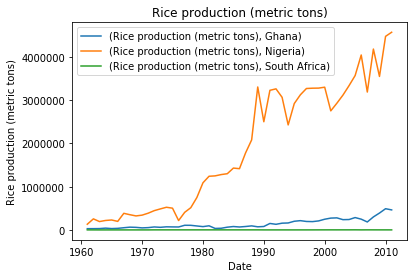

In [29]:
#simple plot with matplotlib with legend, labels, and a title
df2.plot();
plt.legend(loc='best');
plt.title("Rice production (metric tons)");
plt.xlabel('Date'); plt.ylabel('Rice production (metric tons)');

# Normalisation method 1 :simple feature scaling

In [ ]:
#normalisation of your data is useful to prevent your result from being influenced by external
#larger values in the dataset or values of differewnt scalres. it is also useful when the algorithm 
#you are using does not make assumptions about distribution of your data ,such as k-neighbours, svm,decision trees and artificial neural networks

df3 = df2/df2.max()
df3.head()

# Normalisation method 2: min-max scaling

In [30]:
#using sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[df2.columns]= scaler.fit_transform(df2[df2.columns])

In [31]:
df2.head(10)

Rice production (metric tons)                       
country                         Ghana   Nigeria South Africa
date                                                        
1960                              NaN       NaN          NaN
1961                         0.000000  0.000000     0.358519
1962                         0.001301  0.027964     0.179259
1963                         0.004584  0.013982     0.000000
1964                         0.027053  0.019620     0.042469
1965                         0.004803  0.022100     0.091852
1966                         0.016479  0.014884     0.091852
1967                         0.047543  0.056829     0.091852
1968                         0.075741  0.049613     0.091852
1969                         0.066268  0.043299     0.091852

# Normalisation Method 3: Z-score normalisation


In [ ]:
#using sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df2[df2.columns]= scaler.fit_transform(df2[df2.columns])

In [ ]:
df2.head(10)

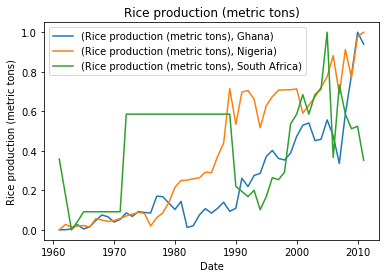

In [32]:
#using the normalise data
#redo the above plot 

df2.plot();
plt.legend(loc='best');
plt.title("Rice production (metric tons)");
plt.xlabel('Date'); plt.ylabel('Rice production (metric tons)');

# Analysing mobile phone call history with pandas

In [36]:
#creating the dataframe
df=pd.read_csv("phone_data.csv")

#print the dataframe
df

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile
...,...,...,...,...,...,...,...
825,825,13/03/15 00:38,1.000,sms,2015-03,world,world
826,826,13/03/15 00:39,1.000,sms,2015-03,Vodafone,mobile
827,827,13/03/15 06:58,34.429,data,2015-03,data,data
828,828,14/03/15 00:13,1.000,sms,2015-03,world,world


In [37]:
#the main columns in the files are:
#date: the date and time entry
#duration :the duration in seconds for each call, the amount of data in mb for each data and the number of texts sent.usually 1 for each sms
#network:
import dateutil

In [38]:
#convert date from string to date times
df['date'] = df['date'].apply(dateutil.parser.parse, dayfirst=True)

In [39]:
#to print the full summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   index         830 non-null    int64         
 1   date          830 non-null    datetime64[ns]
 2   duration      830 non-null    float64       
 3   item          830 non-null    object        
 4   month         830 non-null    object        
 5   network       830 non-null    object        
 6   network_type  830 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 45.5+ KB


In [40]:
#print the short summary  of the
#dataframe by setting verbose = false
df.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Columns: 7 entries, index to network_type
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 45.5+ KB


In [41]:
#print the full summary of the dataframe 
#with null count excluded
df.info(verbose = True, null_counts = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 7 columns):
 #   Column        Dtype         
---  ------        -----         
 0   index         int64         
 1   date          datetime64[ns]
 2   duration      float64       
 3   item          object        
 4   month         object        
 5   network       object        
 6   network_type  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 45.5+ KB


In [42]:
#select first 5 rows in duration column
df['duration'].head()

0    34.429
1    13.000
2    23.000
3     4.000
4     4.000
Name: duration, dtype: float64

In [43]:
df.iloc[:,2].head()

0    34.429
1    13.000
2    23.000
3     4.000
4     4.000
Name: duration, dtype: float64

In [45]:
df.iloc[:, [0,4,5,6]] #using numeric indexing with the  iloc selector and a list of columns

,index,month,network,network_type
0,0,2014-11,data,data
1,1,2014-11,Vodafone,mobile
2,2,2014-11,Meteor,mobile
3,3,2014-11,Tesco,mobile
4,4,2014-11,Tesco,mobile
...,...,...,...,...
825,825,2015-03,world,world
826,826,2015-03,Vodafone,mobile
827,827,2015-03,data,data
828,828,2015-03,world,world


In [46]:
#numeric row selection using the iloc selector
df.iloc[0:10, :] #select the first 10 rows

,index,date,duration,item,month,network,network_type
0,0,2014-10-15 06:58:00,34.429,data,2014-11,data,data
1,1,2014-10-15 06:58:00,13.000,call,2014-11,Vodafone,mobile
2,2,2014-10-15 14:46:00,23.000,call,2014-11,Meteor,mobile
3,3,2014-10-15 14:48:00,4.000,call,2014-11,Tesco,mobile
4,4,2014-10-15 17:27:00,4.000,call,2014-11,Tesco,mobile
5,5,2014-10-15 18:55:00,4.000,call,2014-11,Tesco,mobile
6,6,2014-10-16 06:58:00,34.429,data,2014-11,data,data
7,7,2014-10-16 15:01:00,602.000,call,2014-11,Three,mobile
8,8,2014-10-16 15:12:00,1050.000,call,2014-11,Three,mobile
9,9,2014-10-16 15:30:00,19.000,call,2014-11,voicemail,voicemail


In [47]:
#label based roe selection usiing locselector this id only applicable if u have set and index on ur df
df.loc[20:30] #select row to 30

,index,date,duration,item,month,network,network_type
20,20,2014-10-17 17:29:00,4.000,call,2014-11,Vodafone,mobile
21,21,2014-10-17 17:30:00,375.000,call,2014-11,Tesco,mobile
22,22,2014-10-17 17:42:00,1.000,sms,2014-11,Vodafone,mobile
23,23,2014-10-17 17:44:00,1.000,sms,2014-11,Vodafone,mobile
24,24,2014-10-17 17:44:00,1.000,sms,2014-11,Vodafone,mobile
25,25,2014-10-17 17:44:00,1.000,sms,2014-11,Vodafone,mobile
26,26,2014-10-18 06:58:00,34.429,data,2014-11,data,data
27,27,2014-10-18 11:51:00,783.000,call,2014-11,Tesco,mobile
28,28,2014-10-18 12:06:00,4.000,call,2014-11,Vodafone,mobile
29,29,2014-10-18 12:06:00,3.000,call,2014-11,Vodafone,mobile


In [48]:
#logical based row selection using evaluated ststements
vodafone=df[df["network"] == "Vodafone"] #select the rows where networt 

In [49]:
vodafone

,index,date,duration,item,month,network,network_type
1,1,2014-10-15 06:58:00,13.0,call,2014-11,Vodafone,mobile
17,17,2014-10-17 17:22:00,1.0,sms,2014-11,Vodafone,mobile
18,18,2014-10-17 17:23:00,1.0,sms,2014-11,Vodafone,mobile
20,20,2014-10-17 17:29:00,4.0,call,2014-11,Vodafone,mobile
22,22,2014-10-17 17:42:00,1.0,sms,2014-11,Vodafone,mobile
...,...,...,...,...,...,...,...
808,808,2015-03-03 10:27:00,57.0,call,2015-03,Vodafone,mobile
809,809,2015-03-03 14:34:00,1325.0,call,2015-03,Vodafone,mobile
812,812,2015-03-04 07:02:00,1.0,sms,2015-03,Vodafone,mobile
813,813,2015-03-04 07:16:00,1.0,sms,2015-03,Vodafone,mobile


In [51]:
call=df[df["item"] == "call"] #select rows where the item is call only

In [52]:
call

,index,date,duration,item,month,network,network_type
1,1,2014-10-15 06:58:00,13.0,call,2014-11,Vodafone,mobile
2,2,2014-10-15 14:46:00,23.0,call,2014-11,Meteor,mobile
3,3,2014-10-15 14:48:00,4.0,call,2014-11,Tesco,mobile
4,4,2014-10-15 17:27:00,4.0,call,2014-11,Tesco,mobile
5,5,2014-10-15 18:55:00,4.0,call,2014-11,Tesco,mobile
...,...,...,...,...,...,...,...
807,807,2015-03-03 10:12:00,745.0,call,2015-03,Vodafone,mobile
808,808,2015-03-03 10:27:00,57.0,call,2015-03,Vodafone,mobile
809,809,2015-03-03 14:34:00,1325.0,call,2015-03,Vodafone,mobile
810,810,2015-03-03 18:36:00,768.0,call,2015-03,Three,mobile


# Deleting coumns

In [53]:
#delete the month column from the dataframe "call"
call1 = call.drop("month", axis=1)

In [54]:
call1.head()

,index,date,duration,item,network,network_type
1,1,2014-10-15 06:58:00,13.0,call,Vodafone,mobile
2,2,2014-10-15 14:46:00,23.0,call,Meteor,mobile
3,3,2014-10-15 14:48:00,4.0,call,Tesco,mobile
4,4,2014-10-15 17:27:00,4.0,call,Tesco,mobile
5,5,2014-10-15 18:55:00,4.0,call,Tesco,mobile


In [55]:
#deleting the month coloumn from dataframe call
call2 = call.drop("month", axis=1)

In [56]:
call2.head()

,index,date,duration,item,network,network_type
1,1,2014-10-15 06:58:00,13.0,call,Vodafone,mobile
2,2,2014-10-15 14:46:00,23.0,call,Meteor,mobile
3,3,2014-10-15 14:48:00,4.0,call,Tesco,mobile
4,4,2014-10-15 17:27:00,4.0,call,Tesco,mobile
5,5,2014-10-15 18:55:00,4.0,call,Tesco,mobile


In [57]:
call.drop("duration", axis=1, inplace=True)
#delete the duration column from df using inplace function note that the original data will be changed when inplace=True

In [123]:
call.tail()

,index,date,item,month,network,network_type
807,807,2015-03-03 10:12:00,call,2015-03,Vodafone,mobile
808,808,2015-03-03 10:27:00,call,2015-03,Vodafone,mobile
809,809,2015-03-03 14:34:00,call,2015-03,Vodafone,mobile
810,810,2015-03-03 18:36:00,call,2015-03,Three,mobile
816,816,2015-03-04 12:29:00,call,2015-03,landline,landline


In [58]:
#deleting rows, or set of rows
call.drop([807,808], axis=0)

,index,date,item,month,network,network_type
1,1,2014-10-15 06:58:00,call,2014-11,Vodafone,mobile
2,2,2014-10-15 14:46:00,call,2014-11,Meteor,mobile
3,3,2014-10-15 14:48:00,call,2014-11,Tesco,mobile
4,4,2014-10-15 17:27:00,call,2014-11,Tesco,mobile
5,5,2014-10-15 18:55:00,call,2014-11,Tesco,mobile
...,...,...,...,...,...,...
805,805,2015-03-03 09:57:00,call,2015-03,landline,landline
806,806,2015-03-03 09:59:00,call,2015-03,Three,mobile
809,809,2015-03-03 14:34:00,call,2015-03,Vodafone,mobile
810,810,2015-03-03 18:36:00,call,2015-03,Three,mobile


In [59]:
#deleting the first 5 rows using iloc selector
call3 = call.iloc[5:,]

In [60]:
call3

,index,date,item,month,network,network_type
7,7,2014-10-16 15:01:00,call,2014-11,Three,mobile
8,8,2014-10-16 15:12:00,call,2014-11,Three,mobile
9,9,2014-10-16 15:30:00,call,2014-11,voicemail,voicemail
10,10,2014-10-16 16:21:00,call,2014-11,Three,mobile
19,19,2014-10-17 17:26:00,call,2014-11,Three,mobile
...,...,...,...,...,...,...
807,807,2015-03-03 10:12:00,call,2015-03,Vodafone,mobile
808,808,2015-03-03 10:27:00,call,2015-03,Vodafone,mobile
809,809,2015-03-03 14:34:00,call,2015-03,Vodafone,mobile
810,810,2015-03-03 18:36:00,call,2015-03,Three,mobile


In [61]:
#rename columns using dictionary
#renaming the 'item' column to 'mobile'
call3 = call.rename(columns={"item": "mobile"})

In [62]:
call3

,index,date,mobile,month,network,network_type
1,1,2014-10-15 06:58:00,call,2014-11,Vodafone,mobile
2,2,2014-10-15 14:46:00,call,2014-11,Meteor,mobile
3,3,2014-10-15 14:48:00,call,2014-11,Tesco,mobile
4,4,2014-10-15 17:27:00,call,2014-11,Tesco,mobile
5,5,2014-10-15 18:55:00,call,2014-11,Tesco,mobile
...,...,...,...,...,...,...
807,807,2015-03-03 10:12:00,call,2015-03,Vodafone,mobile
808,808,2015-03-03 10:27:00,call,2015-03,Vodafone,mobile
809,809,2015-03-03 14:34:00,call,2015-03,Vodafone,mobile
810,810,2015-03-03 18:36:00,call,2015-03,Three,mobile


In [129]:
call.head(5)

,index,date,item,month,network,network_type
1,1,2014-10-15 06:58:00,call,2014-11,Vodafone,mobile
2,2,2014-10-15 14:46:00,call,2014-11,Meteor,mobile
3,3,2014-10-15 14:48:00,call,2014-11,Tesco,mobile
4,4,2014-10-15 17:27:00,call,2014-11,Tesco,mobile
5,5,2014-10-15 18:55:00,call,2014-11,Tesco,mobile


In [63]:
#renaming multiple column at once
call3.rename(
    columns={
        "date": "TimeStamp",
        "network": "Mobile Operator"
    },
    inplace=True
)    

In [64]:
call3.head()

,index,TimeStamp,mobile,month,Mobile Operator,network_type
1,1,2014-10-15 06:58:00,call,2014-11,Vodafone,mobile
2,2,2014-10-15 14:46:00,call,2014-11,Meteor,mobile
3,3,2014-10-15 14:48:00,call,2014-11,Tesco,mobile
4,4,2014-10-15 17:27:00,call,2014-11,Tesco,mobile
5,5,2014-10-15 18:55:00,call,2014-11,Tesco,mobile


# output data out to csv

In [65]:
#output data to csv file
#typacally i dont want row number in my output file hence index=false
#to avoid character issues i typically use utf8 encoding for input/output
call3.to_csv("calllog.csv", index=False, encoding='utf8')

In [66]:
df.head()

,index,date,duration,item,month,network,network_type
0,0,2014-10-15 06:58:00,34.429,data,2014-11,data,data
1,1,2014-10-15 06:58:00,13.000,call,2014-11,Vodafone,mobile
2,2,2014-10-15 14:46:00,23.000,call,2014-11,Meteor,mobile
3,3,2014-10-15 14:48:00,4.000,call,2014-11,Tesco,mobile
4,4,2014-10-15 17:27:00,4.000,call,2014-11,Tesco,mobile


In [67]:
#how many rows are in the dataset
df['item'].count()

830

In [68]:
#what was the longest call/data entry
df['duration'].max()

10528.0

In [69]:
#how many seconda of phone calls are recorede in total
df['duration'][df['item'] == 'call'].sum()

92321.0

In [70]:
#how many mbs of data are recorede in total?
df['duration'][df['item'] == 'data'].sum()

5164.35

In [71]:
#how many entries are there for each month
df['month'].value_counts()

2014-11    230
2015-01    205
2014-12    157
2015-02    137
2015-03    101
Name: month, dtype: int64

In [72]:
#number of non-null unique network
df['network'].nunique()

9

In [73]:
df.groupby(['month']).groups.keys()

dict_keys(['2014-11', '2014-12', '2015-01', '2015-02', '2015-03'])

In [74]:
len(df.groupby(['month']).groups['2014-11']) #how many entries for as specific month

230

In [75]:
#get the first entry for each month\
df.groupby('month').first()

,index,date,duration,item,network,network_type
month,,,,,,
2014-11,0,2014-10-15 06:58:00,34.429,data,data,data
2014-12,228,2014-11-13 06:58:00,34.429,data,data,data
2015-01,381,2014-12-13 06:58:00,34.429,data,data,data
2015-02,577,2015-01-13 06:58:00,34.429,data,data,data
2015-03,729,2015-02-12 20:15:00,69.000,call,landline,landline


In [76]:
#get the sum of the durtion per month
df.groupby('month')['duration'].sum()

month
2014-11    26639.441
2014-12    14641.870
2015-01    18223.299
2015-02    15522.299
2015-03    22750.441
Name: duration, dtype: float64

In [77]:
#get the number of dates/entries in each month
df.groupby('month')['date'].count()

month
2014-11    230
2014-12    157
2015-01    205
2015-02    137
2015-03    101
Name: date, dtype: int64

In [78]:
#what is the sum of durations, for calls only to each network
df[df['item']== 'call'].groupby('network')['duration'].sum()

network
Meteor        7200.0
Tesco        13828.0
Three        36464.0
Vodafone     14621.0
landline     18433.0
voicemail     1775.0
Name: duration, dtype: float64

In [146]:
#how many calls, sms, and data entries are in month?
df.groupby(['month', 'item'])['date'].count()

month    item
2014-11  call    107
         data     29
         sms      94
2014-12  call     79
         data     30
         sms      48
2015-01  call     88
         data     31
         sms      86
2015-02  call     67
         data     31
         sms      39
2015-03  call     47
         data     29
         sms      25
Name: date, dtype: int64

In [79]:

dfx = df.unstack(level=0)


In [80]:
dfx

index         0           0
              1           1
              2           2
              3           3
              4           4
                      ...  
network_type  825     world
              826    mobile
              827      data
              828     world
              829     world
Length: 5810, dtype: object

In [81]:
#use the aggregate function
#group the data frame by month and item and extract the number of statistic for each
df.groupby(
   ['month', 'item']
).agg(
    {
        'duration':sum, #sum duration per group
        'network_type': "count", #get the count of networks
        'date': 'first' #get the first date per group
    }    
)

duration  network_type                date
month   item                                             
2014-11 call  25547.000           107 2014-10-15 06:58:00
        data    998.441            29 2014-10-15 06:58:00
        sms      94.000            94 2014-10-16 22:18:00
2014-12 call  13561.000            79 2014-11-14 17:24:00
        data   1032.870            30 2014-11-13 06:58:00
        sms      48.000            48 2014-11-14 17:28:00
2015-01 call  17070.000            88 2014-12-15 20:03:00
        data   1067.299            31 2014-12-13 06:58:00
        sms      86.000            86 2014-12-15 19:56:00
2015-02 call  14416.000            67 2015-01-15 10:36:00
        data   1067.299            31 2015-01-13 06:58:00
        sms      39.000            39 2015-01-15 12:23:00
2015-03 call  21727.000            47 2015-02-12 20:15:00
        data    998.441            29 2015-02-13 06:58:00
        sms      25.000            25 2015-02-19 18:46:00

In [150]:
#group data frame by month item and extract a number of stst fro each
df.groupby(
   ['month', 'item']
).agg(
    {
        'duration': [min, max, sum], # find the min, max and sum of duration per column
        'network_type': "count", #get the number of network type entries
        'date': [min, 'first', 'nunique'] #minimum, first and number of unique dates
    }    
)

duration                       network_type                date  \
                  min        max        sum        count                 min   
month   item                                                                   
2014-11 call    1.000   1940.000  25547.000          107 2014-10-15 06:58:00   
        data   34.429     34.429    998.441           29 2014-10-15 06:58:00   
        sms     1.000      1.000     94.000           94 2014-10-16 22:18:00   
2014-12 call    2.000   2120.000  13561.000           79 2014-11-14 17:24:00   
        data   34.429     34.429   1032.870           30 2014-11-13 06:58:00   
        sms     1.000      1.000     48.000           48 2014-11-14 17:28:00   
2015-01 call    2.000   1859.000  17070.000           88 2014-12-15 20:03:00   
        data   34.429     34.429   1067.299           31 2014-12-13 06:58:00   
        sms     1.000      1.000     86.000           86 2014-12-15 19:56:00   
2015-02 call    1.000   1863.000  14416.000           67 2015-01-15 10:36:00   
        data   34.429     34.429   1067.299           31 2015-01-13 06:58:00   
        sms     1.000      1.000     39.000           39 2015-01-15 12:23:00   
2015-03 call    2.000  10528.000  21727.000           47 2015-02-12 20:15:00   
        data   34.429     34.429    998.441           29 2015-02-13 06:58:00   
        sms     1.000      1.000     25.000           25 2015-02-19 18:46:00   

                                          
                           first nunique  
month   item                              
2014-11 call 2014-10-15 06:58:00     104  
        data 2014-10-15 06:58:00      29  
        sms  2014-10-16 22:18:00      79  
2014-12 call 2014-11-14 17:24:00      76  
        data 2014-11-13 06:58:00      30  
        sms  2014-11-14 17:28:00      41  
2015-01 call 2014-12-15 20:03:00      84  
        data 2014-12-13 06:58:00      31  
        sms  2014-12-15 19:56:00      58  
2015-02 call 2015-01-15 10:36:00      67  
        data 2015-01-13 06:58:00      31  
        sms  2015-01-15 12:23:00      27  
2015-03 call 2015-02-12 20:15:00      47  
        data 2015-02-13 06:58:00      29  
        sms  2015-02-19 18:46:00      17

In [82]:
df[df['item'] == 'call'].groupby('month').agg(
#get max of the duration column for each group
    max_duration=('duration', max),
#get min of the duration column for each group
    min_duration=('duration', min),
#get sum of the duration column for each group
    total_duration=('duration', sum),
#apply lambda to date column
     num_days=("date", lambda x: (max(x) - min(x)).days)
) 
#use lambda to extract stats that are not provided by the built in options

,max_duration,min_duration,total_duration,num_days
month,,,,
2014-11,1940.0,1.0,25547.0,28
2014-12,2120.0,2.0,13561.0,30
2015-01,1859.0,2.0,17070.0,30
2015-02,1863.0,1.0,14416.0,25
2015-03,10528.0,2.0,21727.0,19


In [ ]:
#RE-SHAPING DATA

In [83]:
stock_df = pd.read_csv("stock.csv")

In [158]:
stock_df

,Date,Company,Open,High,Low,Close,Volume
0,16/12/19,FB,195.270004,199.119995,194.809998,197.919998,14911500
1,17/12/19,FB,198.839996,199.000000,196.130005,198.389999,10175700
2,18/12/19,FB,200.089996,204.300003,200.089996,202.500000,23274400
3,19/12/19,FB,202.779999,206.300003,202.509995,206.059998,16514600
4,16/12/19,NKE,98.139999,99.339996,98.059998,98.809998,8211300
5,17/12/19,NKE,99.379997,100.169998,99.050003,99.650002,7050700
6,18/12/19,NKE,100.199997,100.790001,99.580002,100.570000,7332000
7,19/12/19,NKE,100.500000,101.269997,99.629997,101.150002,12214500
8,16/12/19,GOOG,1356.500000,1364.680054,1352.670044,1361.170044,1397300
9,17/12/19,GOOG,1362.890015,1365.000000,1351.322998,1355.119995,1854000


In [84]:
#pivot
stocks_pivot = stock_df.pivot(index="Company", columns="Date", values="Close")
stocks_pivot

Date,16/12/19,17/12/19,18/12/19,19/12/19
Company,,,,
FB,197.919998,198.389999,202.500000,206.059998
GOOG,1361.170044,1355.119995,1352.619995,1356.040039
NFLX,304.209991,315.480011,320.799988,332.220001
NKE,98.809998,99.650002,100.570000,101.150002


In [85]:
#reshape method 2:melt
company_df = pd.read_csv("reshape.csv")
company_df

,Name,Dept,Age
0,Robert,Manufacturing,45
1,Roger,Manufacturing,36
2,Nadal,Marketing,31
3,Novak,Sales,31
4,Chris,Marketing,38
5,Jeremy,Manufacturing,39
6,Scarlett,Sales,35


In [86]:
company_melt = pd.melt(company_df, id_vars=["Name"])
company_melt

,Name,variable,value
0,Robert,Dept,Manufacturing
1,Roger,Dept,Manufacturing
2,Nadal,Dept,Marketing
3,Novak,Dept,Sales
4,Chris,Dept,Marketing
5,Jeremy,Dept,Manufacturing
6,Scarlett,Dept,Sales
7,Robert,Age,45
8,Roger,Age,36
9,Nadal,Age,31


In [87]:
pd.melt(company_df, id_vars=["Name"], value_vars=["Dept"])

,Name,variable,value
0,Robert,Dept,Manufacturing
1,Roger,Dept,Manufacturing
2,Nadal,Dept,Marketing
3,Novak,Dept,Sales
4,Chris,Dept,Marketing
5,Jeremy,Dept,Manufacturing
6,Scarlett,Dept,Sales


In [88]:
#customise variable and var names
pd.melt(company_df, id_vars=["Name"], value_vars=["Dept"], var_name= "What Variable?", value_name="Which Dept?")

,Name,What Variable?,Which Dept?
0,Robert,Dept,Manufacturing
1,Roger,Dept,Manufacturing
2,Nadal,Dept,Marketing
3,Novak,Dept,Sales
4,Chris,Dept,Marketing
5,Jeremy,Dept,Manufacturing
6,Scarlett,Dept,Sales


# Reshape method 3:Stack and unstack

In [89]:
#stack to reshape from wide to long
#unstack to reshape from long to wide
#creating a multi index data frame
header = pd.MultiIndex.from_product([['Before Upskilling', 'After Upskilling'],['Age', 'Salary']])
d=([[25,45000,27,56000],[38,89000,41,102000],[30,67000,31,70000],[45,130000,48,160000]])
upskilling_df = pd.DataFrame(d,
                   index=['Marcus', 'Anthony', 'Mason', 'Daniel'],        
                   columns=header)
upskilling_df

Before Upskilling         After Upskilling        
                      Age  Salary              Age  Salary
Marcus                 25   45000               27   56000
Anthony                38   89000               41  102000
Mason                  30   67000               31   70000
Daniel                 45  130000               48  160000

In [90]:
#stacking wide to long
upskill_stacked = upskilling_df.stack()

In [91]:
upskill_stacked

After Upskilling  Before Upskilling
Marcus  Age                   27                 25
        Salary             56000              45000
Anthony Age                   41                 38
        Salary            102000              89000
Mason   Age                   31                 30
        Salary             70000              67000
Daniel  Age                   48                 45
        Salary            160000             130000

In [92]:
#level 0 stacking
upskilling_df.stack(level=0)

Age  Salary
Marcus  After Upskilling    27   56000
        Before Upskilling   25   45000
Anthony After Upskilling    41  102000
        Before Upskilling   38   89000
Mason   After Upskilling    31   70000
        Before Upskilling   30   67000
Daniel  After Upskilling    48  160000
        Before Upskilling   45  130000

In [93]:
#unstacking- long to wide
upskill_stacked.unstack()

After Upskilling         Before Upskilling        
                     Age  Salary               Age  Salary
Anthony               41  102000                38   89000
Daniel                48  160000                45  130000
Marcus                27   56000                25   45000
Mason                 31   70000                30   67000

# Reshape method 4-pivot Table

In [94]:
stocks_pivottable = pd.pivot_table(stock_df, index="Company")
stocks_pivottable

,Close,High,Low,Open,Volume
Company,,,,,
FB,201.217499,202.180000,198.384999,199.244999,16219050
GOOG,1356.237518,1362.062500,1350.994507,1356.952484,1560950
NFLX,318.177498,320.174988,311.252502,312.242500,9028925
NKE,100.045000,100.392498,99.080000,99.554998,8702125


In [95]:
pd.pivot_table(stock_df, index=["Company", "Date"])

Close         High          Low         Open    Volume
Company Date                                                                  
FB      16/12/19   197.919998   199.119995   194.809998   195.270004  14911500
        17/12/19   198.389999   199.000000   196.130005   198.839996  10175700
        18/12/19   202.500000   204.300003   200.089996   200.089996  23274400
        19/12/19   206.059998   206.300003   202.509995   202.779999  16514600
GOOG    16/12/19  1361.170044  1364.680054  1352.670044  1356.500000   1397300
        17/12/19  1355.119995  1365.000000  1351.322998  1362.890015   1854000
        18/12/19  1352.619995  1360.469971  1351.000000  1356.599976   1522600
        19/12/19  1356.040039  1358.099976  1348.984985  1351.819946   1469900
NFLX    16/12/19   304.209991   305.709991   298.630005   300.850006   4658900
        17/12/19   315.480011   316.799988   306.600006   307.359985  10427100
        18/12/19   320.799988   325.359985   315.600006   316.260010  11207400
        19/12/19   332.220001   332.829987   324.179993   324.500000   9822300
NKE     16/12/19    98.809998    99.339996    98.059998    98.139999   8211300
        17/12/19    99.650002   100.169998    99.050003    99.379997   7050700
        18/12/19   100.570000   100.790001    99.580002   100.199997   7332000
        19/12/19   101.150002   101.269997    99.629997   100.500000  12214500

In [96]:
pd.pivot_table(stock_df, index="Company", aggfunc=np.sum, values="Volume")

,Volume
Company,
FB,64876200
GOOG,6243800
NFLX,36115700
NKE,34808500


In [97]:
pd.pivot_table(stock_df, index="Company", aggfunc=[np.amin, np.amax])

amin                                                   \
               Close      Date         High          Low         Open   
Company                                                                 
FB        197.919998  16/12/19   199.000000   194.809998   195.270004   
GOOG     1352.619995  16/12/19  1358.099976  1348.984985  1351.819946   
NFLX      304.209991  16/12/19   305.709991   298.630005   300.850006   
NKE        98.809998  16/12/19    99.339996    98.059998    98.139999   

                          amax                                      \
           Volume        Close      Date         High          Low   
Company                                                              
FB       10175700   206.059998  19/12/19   206.300003   202.509995   
GOOG      1397300  1361.170044  19/12/19  1365.000000  1352.670044   
NFLX      4658900   332.220001  19/12/19   332.829987   324.179993   
NKE       7050700   101.150002  19/12/19   101.269997    99.629997   

                                
                Open    Volume  
Company                         
FB        202.779999  23274400  
GOOG     1362.890015   1854000  
NFLX      324.500000  11207400  
NKE       100.500000  12214500

In [98]:
# long to wide
#pivot-use for single index
#unstack- use for multiple index

#wide to long
#melt - use for single index
#stack- use for multiple index
#pivot table; use for aggregation and reshaping

# Data Encoding 

In [ ]:
#creating the dataframe
df = pd.read